In [100]:
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import math

#import tensorflow as tf
#tf.set_random_seed(1234)

# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM, SimpleRNN # LSTM is an improvement of RNN
# from sklearn.metrics import mean_squared_error

%matplotlib inline

#from google.colab import files

In [16]:
from sklearn.feature_selection import SelectKBest , f_classif , f_regression , VarianceThreshold
from sklearn.model_selection import train_test_split

In [101]:
df = pd.read_csv('POWER_Point_Hourly_20200501_20200731_005d5516N_000d2686W_LST.csv', skiprows = 15)
df.head() # returns the first 5 rows of the dataset

,YEAR,MO,DY,HR,PS,WS10M,WD10M,WS50M,RH2M,PRECTOTCORR,T2M
0,2020,5,1,0,101.05,2.49,264.79,3.32,90.12,0.08,26.15
1,2020,5,1,1,100.97,2.31,260.06,3.05,90.25,0.12,26.02
2,2020,5,1,2,100.92,2.20,254.14,2.85,90.19,0.19,25.91
3,2020,5,1,3,100.90,2.23,250.36,2.88,90.00,0.19,25.87
4,2020,5,1,4,100.92,2.24,247.20,2.88,90.00,0.15,25.83


In [102]:
df.columns # provides a list of all the column names

Index(['YEAR', 'MO', 'DY', 'HR', 'PS', 'WS10M', 'WD10M', 'WS50M', 'RH2M',
       'PRECTOTCORR', 'T2M'],
      dtype='object')

In [103]:
df.info() # gives a structural summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         2208 non-null   int64  
 1   MO           2208 non-null   int64  
 2   DY           2208 non-null   int64  
 3   HR           2208 non-null   int64  
 4   PS           2208 non-null   float64
 5   WS10M        2208 non-null   float64
 6   WD10M        2208 non-null   float64
 7   WS50M        2208 non-null   float64
 8   RH2M         2208 non-null   float64
 9   PRECTOTCORR  2208 non-null   float64
 10  T2M          2208 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 189.9 KB


In [ ]:
df [df['MO']== 5] # shows only data specific to the 5th month

In [ ]:
df_month = df[df['MO']== 5]  # same as code above (specifies a month)
df_month['DY'].unique() # lists out the days assigned to the month

In [ ]:
df[df['MO']== 5]['WS10M'].mean() # returns the mean of the specified feature for the 5th month

# Plots

Text(0.5, 1.0, 'Daily Wind direction at 10m for the period May to July')

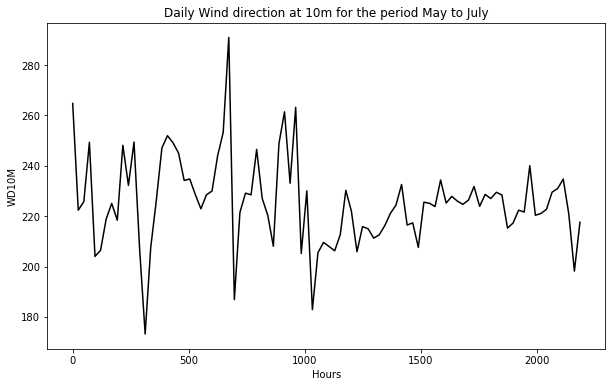

In [64]:

df_day = df[::24] # df[::24] returns the data values after every 24 hrs (daily computation )
df_day # This is useful in plotting the daily observations in the features.
plt.figure(figsize=(10,6)) #- unhash to increase the size of the figure. 
#plt.plot(df_day['WD10M'], 'k') # This plots the daily wind direction at 10m. 'k' specifies the black color 
plt.xlabel('Hours')
plt.ylabel('WD10M')
plt.plot(df_day['WD10M'], 'k')
plt.title('Daily Wind direction at 10m for the period May to July')


Text(0.5, 1.0, 'Surface Pressure at 10m for the period May to July')

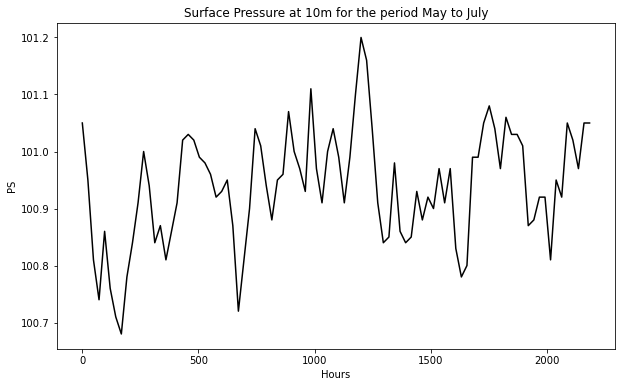

In [65]:
plt.figure(figsize=(10,6)) #- unhash to increase the size of the figure. 
#plt.plot(df_day['WD10M'], 'k') # This plots the daily wind direction at 10m. 'k' specifies the black color 
plt.xlabel('Hours')
plt.ylabel('PS')
plt.plot(df_day['PS'], 'k')
plt.title('Surface Pressure at 10m for the period May to July')

Text(0.5, 1.0, 'Precipitation for the period May to July')

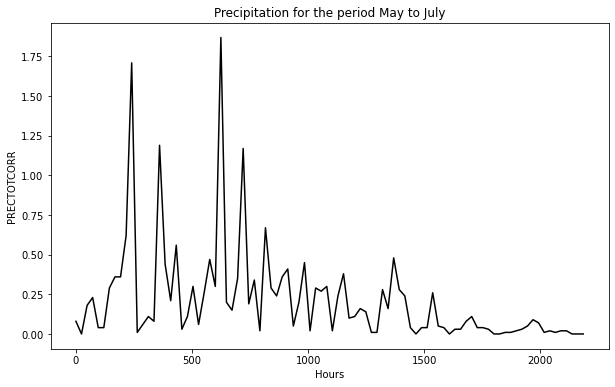

In [66]:
plt.figure(figsize=(10,6)) #- unhash to increase the size of the figure. 
#plt.plot(df_day['WD10M'], 'k') # This plots the daily wind direction at 10m. 'k' specifies the black color 
plt.xlabel('Hours')
plt.ylabel('PRECTOTCORR')
plt.plot(df_day['PRECTOTCORR'], 'k')
plt.title('Precipitation for the period May to July')

Text(0.5, 1.0, 'Relative Humidity at 2 meters for the period May to July')

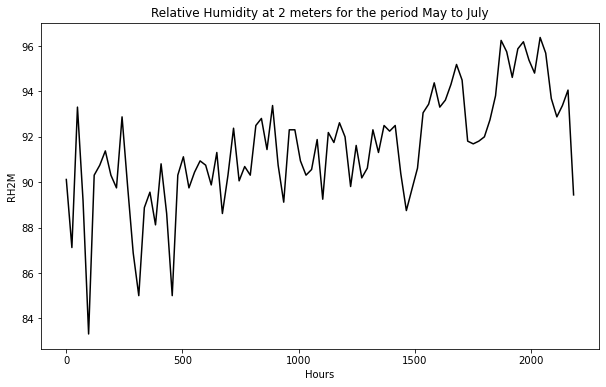

In [67]:
plt.figure(figsize=(10,6)) #- unhash to increase the size of the figure. 
#plt.plot(df_day['WD10M'], 'k') # This plots the daily wind direction at 10m. 'k' specifies the black color 
plt.xlabel('Hours')
plt.ylabel('RH2M')
plt.plot(df_day['RH2M'], 'k')
plt.title('Relative Humidity at 2 meters for the period May to July')

Text(0.5, 1.0, 'Temperature at 2 meters for the period May to July')

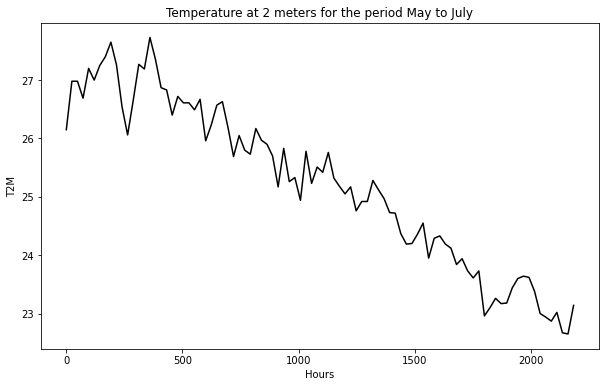

In [68]:
plt.figure(figsize=(10,6)) #- unhash to increase the size of the figure. 
#plt.plot(df_day['WD10M'], 'k') # This plots the daily wind direction at 10m. 'k' specifies the black color 
plt.xlabel('Hours')
plt.ylabel('T2M')
plt.plot(df_day['T2M'], 'k')
plt.title('Temperature at 2 meters for the period May to July')

Text(0.5, 1.0, 'Wind Speed at 50 meters for the period May to July')

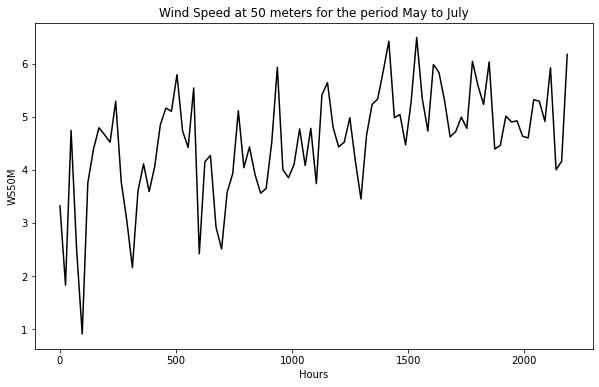

In [69]:
plt.figure(figsize=(10,6)) #- unhash to increase the size of the figure. 
#plt.plot(df_day['WD10M'], 'k') # This plots the daily wind direction at 10m. 'k' specifies the black color 
plt.xlabel('Hours')
plt.ylabel('WS50M')
plt.plot(df_day['WS50M'], 'k')
plt.title('Wind Speed at 50 meters for the period May to July')

Text(0.5, 1.0, 'Wind Direction at 10 meters for the period May to July')

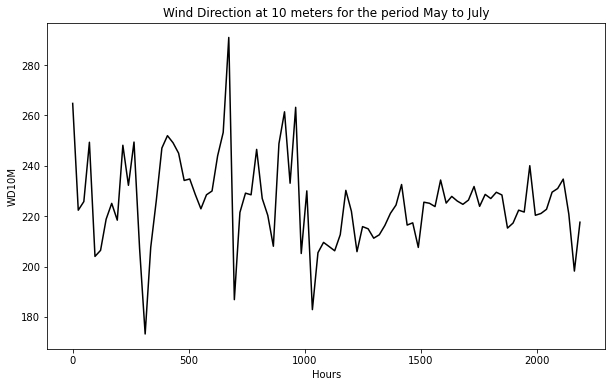

In [70]:
plt.figure(figsize=(10,6)) #- unhash to increase the size of the figure. 
#plt.plot(df_day['WD10M'], 'k') # This plots the daily wind direction at 10m. 'k' specifies the black color 
plt.xlabel('Hours')
plt.ylabel('WD10M')
plt.plot(df_day['WD10M'], 'k')
plt.title('Wind Direction at 10 meters for the period May to July')

Text(0.5, 1.0, 'Wind Speed at 10 meters for the period May to July')

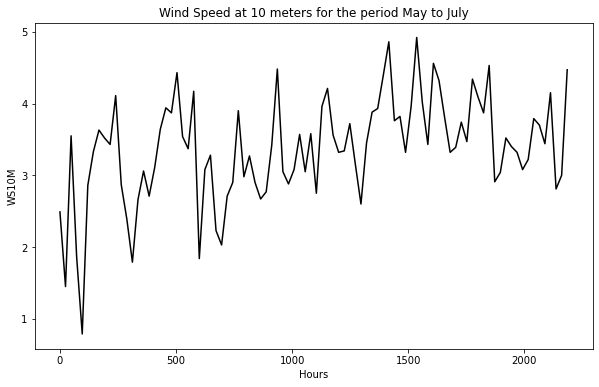

In [71]:
plt.figure(figsize=(10,6)) #- unhash to increase the size of the figure. 
#plt.plot(df_day['WD10M'], 'k') # This plots the daily wind direction at 10m. 'k' specifies the black color 
plt.xlabel('Hours')
plt.ylabel('WS10M')
plt.plot(df_day['WS10M'], 'k')
plt.title('Wind Speed at 10 meters for the period May to July')

# OK

# Daily average of feature

In [98]:
def dailyavg(feat , month , color):
    '''This takes the daily average of the feature properties for the specified month.
    '''
    avg=[]
    df_month = df[df['MO']== month]
    for value in df_month['DY'].unique():
      avg.append(df_month[df_month['DY']== value][feat].mean())
    plt.figure(figsize=(10,8))
    plt.plot(avg , color)
    plt.title ('Daily average of ' + feat + ' for the month number ' + str(month))
    plt.xlabel('Days')
    plt.ylabel(feat)
    return plt.show()

In [88]:
df.columns[4:]

Index(['PS', 'WS10M', 'WD10M', 'WS50M', 'RH2M', 'PRECTOTCORR', 'T2M'], dtype='object')

In [90]:
len(df.columns[4:])

7

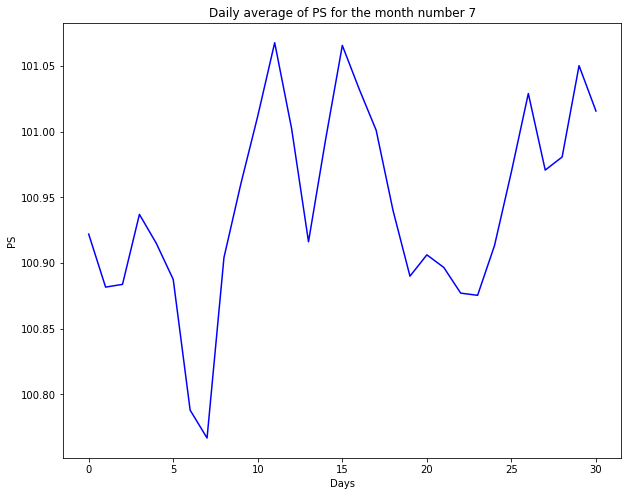

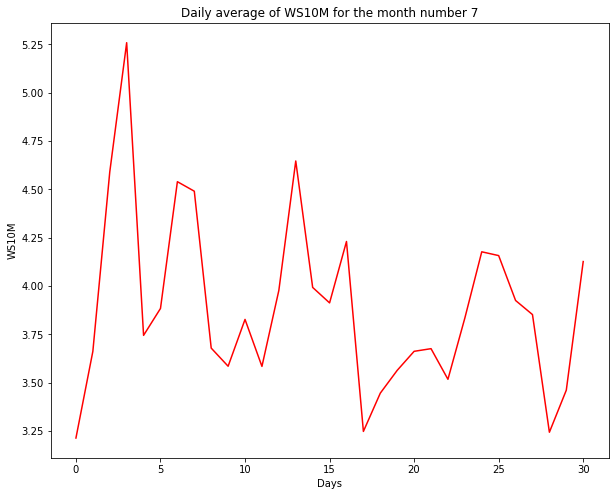

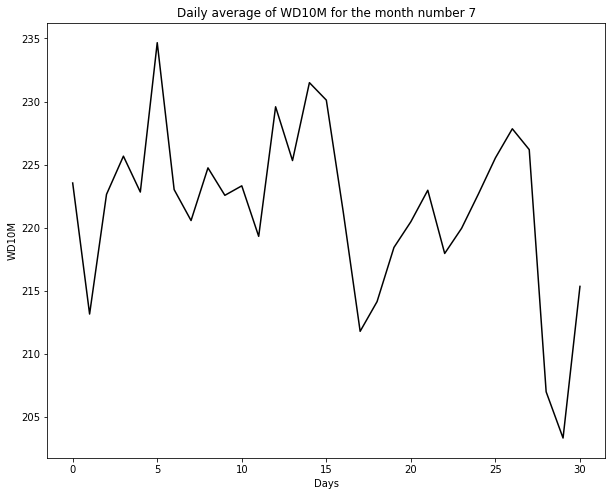

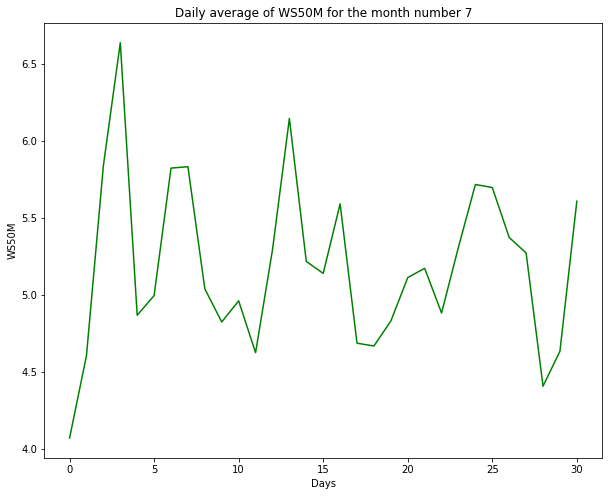

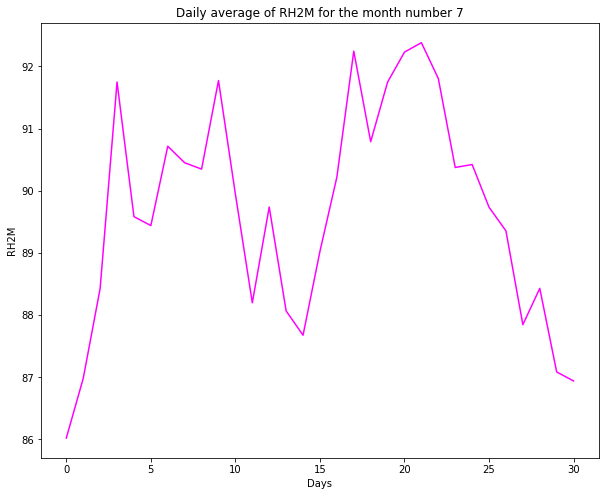

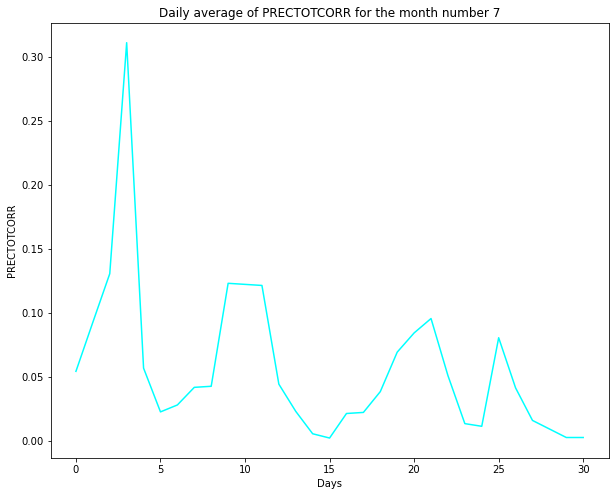

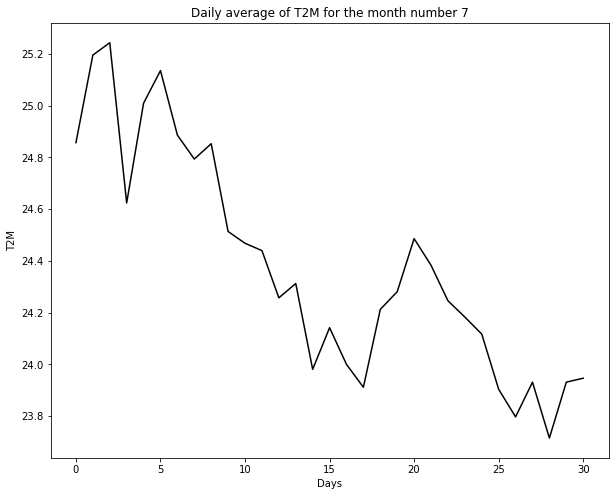

In [99]:
cols = ['blue' , 'red' , 'k' , 'g' , 'magenta' , 'cyan','k']
#n=7
for col in range(len(df.columns[4:])):
    dailyavg(df.columns[4:][col],7, cols[col])
    ''' This applies the dailyavg function from the 6th feature to the last.
        '''